In [2]:
import pandas as pd
import numpy as np
import matplotlib
import string

In [3]:
pedals = pd.read_csv(r'C:\Users\roast\Desktop\reddit_guitarpedals_1000.csv')

In [4]:
pedals.columns

Index(['subreddit', 'title', 'selftext', 'upvote_ratio', 'ups', 'downs',
       'score', 'num_comments', 'created_utc', 'id', 'kind', 'url',
       'thumbnail'],
      dtype='object')

In [5]:
pedals.head(5)

,subreddit,title,selftext,upvote_ratio,ups,downs,score,num_comments,created_utc,id,kind,url,thumbnail
0,guitarpedals,First Pedalboard (reconfigured) I redistribute...,NaN,1.00,2,0,2,2,06/12/2022 17:21:49,vavtca,t3,https://i.redd.it/aqc85ox2c9591.png,https://a.thumbs.redditmedia.com/4lQdyYjEWH_da...
1,guitarpedals,never really listened to Calvin Harris but I l...,NaN,1.00,1,0,1,1,06/12/2022 17:18:47,vavr2d,t3,https://youtu.be/FFV6t4Dl_zQ,https://a.thumbs.redditmedia.com/75IxJ6tQug7hZ...
2,guitarpedals,Boss RC-300 Loop Pedals no longer working?,"Hello Everyone,\n\nI've owned a Boss RC-300 pe...",0.67,1,0,1,1,06/12/2022 16:59:31,vavc8h,t3,https://www.reddit.com/r/guitarpedals/comments...,self
3,guitarpedals,What’s your favorite effect??,Mine’s the Wah,0.67,2,0,2,23,06/12/2022 16:24:51,vauluw,t3,https://www.reddit.com/r/guitarpedals/comments...,self
4,guitarpedals,Help me decide which pedal to get,Hey guys I need your help deciding if I should...,0.81,3,0,3,8,06/12/2022 16:18:58,vauhff,t3,https://www.reddit.com/r/guitarpedals/comments...,self


In [6]:
#Changing dtypes of all columns
pedals['created_utc'] = pd.to_datetime(pedals['created_utc'])
pedals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   subreddit     994 non-null    object        
 1   title         994 non-null    object        
 2   selftext      467 non-null    object        
 3   upvote_ratio  994 non-null    float64       
 4   ups           994 non-null    int64         
 5   downs         994 non-null    int64         
 6   score         994 non-null    int64         
 7   num_comments  994 non-null    int64         
 8   created_utc   994 non-null    datetime64[ns]
 9   id            994 non-null    object        
 10  kind          994 non-null    object        
 11  url           994 non-null    object        
 12  thumbnail     994 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 101.1+ KB


In [7]:
# Removing punctuations from every title
pedals_titles = []
for i in range(len(pedals['title'])):
    words = pedals['title'][i].lower().split()

    words = [''.join(letter for letter in word if letter not in string.punctuation) for word in words]
    pedals_titles.append(words)

#Doing same for selftext
selftext_wordlist = []
for i in range(len(pedals['selftext'])):
    if(type(pedals['selftext'][i]) == str):
        words = pedals['selftext'][i].lower().split()

        words = [''.join(letter for letter in word if letter not in string.punctuation) for word in words]
        selftext_wordlist.append(words)

In [8]:
# {word: frequency}
# Removing punctuation
# Removing symbols
# all lower case

word_freq_title = {}
word_freq_selftext = {}

for title in range(len(pedals_titles)):
    for word in pedals_titles[title]:
        if word not in word_freq_title:
            word_freq_title[word] = 0
        word_freq_title[word] += 1

for title in range(len(selftext_wordlist)):
    for word in selftext_wordlist[title]:
        if word not in word_freq_selftext:
            word_freq_selftext[word] = 0
        word_freq_selftext[word] += 1

In [9]:
#First 10 k:v in title dict
dict(list(word_freq_title.items())[0: 5])

{'first': 46,
 'pedalboard': 59,
 'reconfigured': 1,
 'i': 138,
 'redistributed': 1}

In [10]:
#First 10 k:v in selftext dict
dict(list(word_freq_selftext.items())[0: 5])

{'hello': 12, 'everyone': 17, 'ive': 94, 'owned': 11, 'a': 1477}

In [11]:
#Removing stop word
stop_words = ['a','an','and','are','as','be','by','by',	'for','from','has','he','in','is','it','its',
	'of','on','that','the',	'to','was',	'were','will','with','have','am', 'my', 'i', 'this', 'you', 'what', 
    'but', 'or', 'do', 'can']

title_dict = {}
for k, v in word_freq_title.items():
    if k not in stop_words:
        title_dict[k] = v
title_dict.pop('') #removing ' ' blank in title dict

123

In [12]:
selftext_dict = {}
for k, v in word_freq_selftext.items():
    if k not in stop_words:
        selftext_dict[k] = v
selftext_dict.pop('') #removing ' ' blank in selftext dict

255

In [13]:
# Sorting the title_freq for later
kv = ((value, key) for (key,value) in title_dict.items())
sorted_title = sorted(kv, reverse=True)
sorted_title[0:5]

[(199, 'pedal'), (160, 'npd'), (117, 'board'), (103, 'pedals'), (62, 'boss')]

In [14]:
# Sorting the selftext_freq for later
kv = ((value, key) for (key,value) in selftext_dict.items())
sorted_title = sorted(kv, reverse=True)
sorted_title[0:5]

[(452, 'pedal'), (297, 'pedals'), (286, 'so'), (250, 'like'), (232, 'im')]

In [15]:
#Title word freq df
title_df = pd.DataFrame(title_dict.values(), index=title_dict.keys(), columns=['Frequency'])
title_df.index.name = 'Word'
title_df.head()

,Frequency
Word,
first,46
pedalboard,59
reconfigured,1
redistributed,1
pedals,103


In [16]:
#Selftext word freq df
selftext_df = pd.DataFrame(selftext_dict.values(), index=selftext_dict.keys(), columns=['Frequency'])
selftext_df.index.name = 'Word'
selftext_df.head()

,Frequency
Word,
hello,12
everyone,17
ive,94
owned,11
boss,87


In [17]:
merged = pd.merge(title_df, selftext_df, left_index=True, right_index=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1690 entries, first to boosts
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Frequency_x  1690 non-null   int64
 1   Frequency_y  1690 non-null   int64
dtypes: int64(2)
memory usage: 39.6+ KB


In [18]:
merged['Frequency'] = merged['Frequency_x'] + merged['Frequency_y']
word_freq = merged.drop(['Frequency_x', 'Frequency_y'], 1)

C:\Users\roast\AppData\Local\Temp\ipykernel_24940\2355921377.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  word_freq = merged.drop(['Frequency_x', 'Frequency_y'], 1)


In [19]:
#Final, combined dataframe of word frequencies from both titles and self texts. 
word_freq.head()

,Frequency
Word,
first,101
pedalboard,97
pedals,400
based,14
advise,2


In [20]:
word_freq.to_csv(r'C:\Users\roast\Desktop\gp_title_freq.csv', index=True)

### Pandas

In [21]:
#Pandas dataframe and analysis
#First, title analysis. Which pedals/brands were mentioned the most? 
import matplotlib.pyplot as plt

df_wordfreq = pd.DataFrame(word_freq, columns=['Frequency']).sort_values(by = 'Frequency', ascending=False)
df_wordfreq.head()


,Frequency
Word,
pedal,651
pedals,400
so,302
like,276
im,246


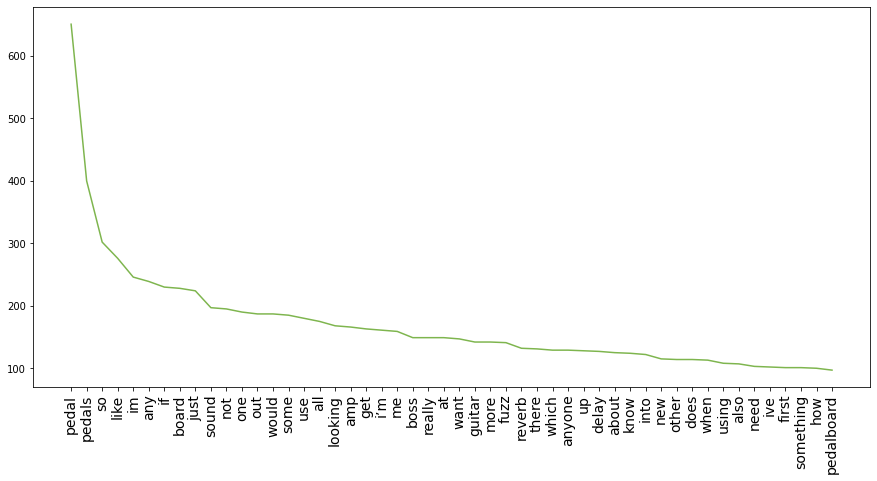

In [22]:
#Top 50 words mentioned
top_50 = df_wordfreq.iloc[0:50]
y = top_50['Frequency']

plt.xticks(fontsize = 14, rotation='vertical')
plt.gcf().set_size_inches(15, 7)
plt.plot(y, color = '#7eb54e',)
plt.show()

### Pandas - Brand Mention Frequncy

In [23]:
pedal_brands = ['BOSS', 'Strymon', 'Electro', 'Harmonix', 'Electro-Harmonix', 'Electroharmonix', 'EHX', 
'TC Electronic', 'Walrus','Eventide','DigiTech','Zoom','Earthquaker','Jim','Dunlop',
'Fender','MXR', 'Catalinbread','Donner', 'SubZero','Keeley', 'Behringer', 'Fulltone', 
'Joyo', 'Mooer', 'Universal', 'rat']

#lower case
for i in range(len(pedal_brands)):
   pedal_brands[i] = pedal_brands[i].lower()

In [24]:
print(pedal_brands)

['boss', 'strymon', 'electro', 'harmonix', 'electro-harmonix', 'electroharmonix', 'ehx', 'tc electronic', 'walrus', 'eventide', 'digitech', 'zoom', 'earthquaker', 'jim', 'dunlop', 'fender', 'mxr', 'catalinbread', 'donner', 'subzero', 'keeley', 'behringer', 'fulltone', 'joyo', 'mooer', 'universal', 'rat']


In [25]:
#Most mentioned brands
brand = df_wordfreq[df_wordfreq.index.isin(pedal_brands)]
brand

,Frequency
Word,
boss,149
mxr,48
ehx,45
strymon,44
fender,30
walrus,27
digitech,24
behringer,24
zoom,21


In [41]:
votes_df = pedals[['upvote_ratio', 'ups', 'downs', 'score']]

In [42]:
votes_df.head()

,upvote_ratio,ups,downs,score
0,1.00,2,0,2
1,1.00,1,0,1
2,0.67,1,0,1
3,0.67,2,0,2
4,0.81,3,0,3


In [68]:
votes_df.mean()

upvote_ratio     0.860111
ups             35.660966
downs            0.000000
score           35.660966
dtype: float64

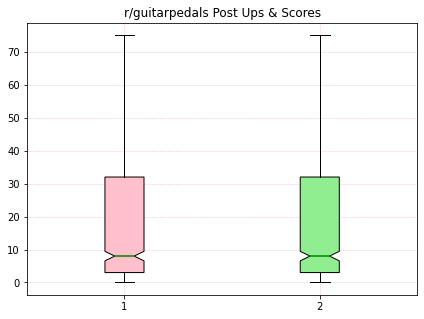

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
ax = plt.boxplot(votes_df[['ups', 'score']], widths=(0.2, 0.2), 
                            showfliers=False, notch=True,vert=True, patch_artist=True)
for median in ax['medians']:
    median.set(color='green', linewidth=1.5)
colors = ['pink', 'lightgreen']
for bplot in ax:
    for patch, color in zip(ax['boxes'], colors):
        patch.set_facecolor(color)

plt.title("r/guitarpedals Post Ups & Scores") 
plt.grid(color = 'lightpink', linestyle = '--', linewidth = 0.5)
plt.show()

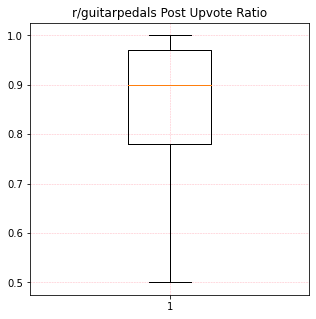

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax = plt.boxplot(votes_df['upvote_ratio'], widths=(0.3), showfliers=False)

plt.title("r/guitarpedals Post Upvote Ratio") 
plt.grid(color = 'lightpink', linestyle = '--', linewidth = 0.5)
plt.show()